In [7]:
import numpy as np
import pandas as pd
import glob

%matplotlib inline
from matplotlib import pyplot as plt

In [27]:
# Note possible slide ID mismatches between performance and time
perf_files = [
    '../seg.05x.densenet_s/eval.csv',
    '../seg.10x.densenet_s/eval.csv',
    '../seg.20x.densenet_s/eval.csv'
]
time_files = [
    '../seg.05x.densenet_s/processing_time.txt',
    '../seg.10x.densenet_s/processing_time.txt',
    '../seg.20x.densenet_s/processing_time.txt'
]
labels = ['5X', '10X', '20X']

In [36]:
def read_tables(pfile, tfile):
    d = pd.read_csv(pfile, index_col = 0)
    f1 = d['EpitheliumF1'].values

    t = pd.read_csv(tfile, sep='\t', header=None)
    # The last row is the mean time -- drop it.
    drp = t.index[-1]
    t = t.drop(drp, axis=0)
    t = t[1].values
    
    return f1, t

f1s, times = [], []
for i,label in enumerate(labels):
    f1, t = read_tables(perf_files[i], time_files[i])
#     f1s[label] = f1
#     times[label] = t
    f1s.append(f1)
    times.append(t)

Text(0.5, 0.98, 'DenseNet-small')

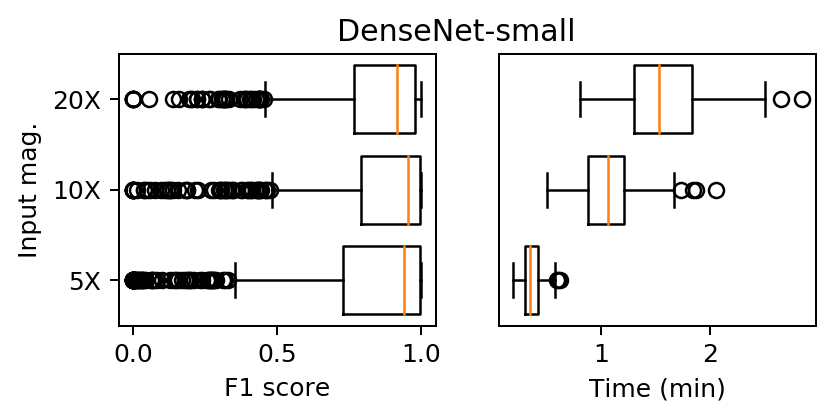

In [52]:
fig, axs = plt.subplots(1,2, figsize=(5,2), dpi=180)
_ = axs[0].boxplot(f1s, vert=False, widths=0.75)
axs[0].set_xlabel('F1 score')
axs[0].set_ylabel('Input mag.')
axs[0].set_yticklabels(labels)
_ = axs[1].boxplot(times, vert=False, widths=0.75)
axs[1].set_xlabel('Time (min)')
axs[1].set_yticks([])
plt.suptitle('DenseNet-small')